In [19]:
import requests
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [20]:
def json_datafram(response):
    return pd.DataFrame(response.json()[1:], columns= response.json()[0])


In [21]:
url_summary = "https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
url_owner = "https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
url_buisness = "https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP,EMP&for=state:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
url_tech = "https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017_LABEL,TECHUSE,FIRMPDEMP,EMP&for=state:*&NAICS2017=00&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
response_summary = requests.request("GET", url_summary)
response_owner = requests.request("GET", url_owner)
response_tech = requests.request("GET",url_tech)
response_buisness = requests.request("GET",url_buisness)

In [22]:
df_owner = json_datafram(response_owner)
df_summary = json_datafram(response_summary)
df_tech = json_datafram(response_tech)
df_business = json_datafram(response_buisness)

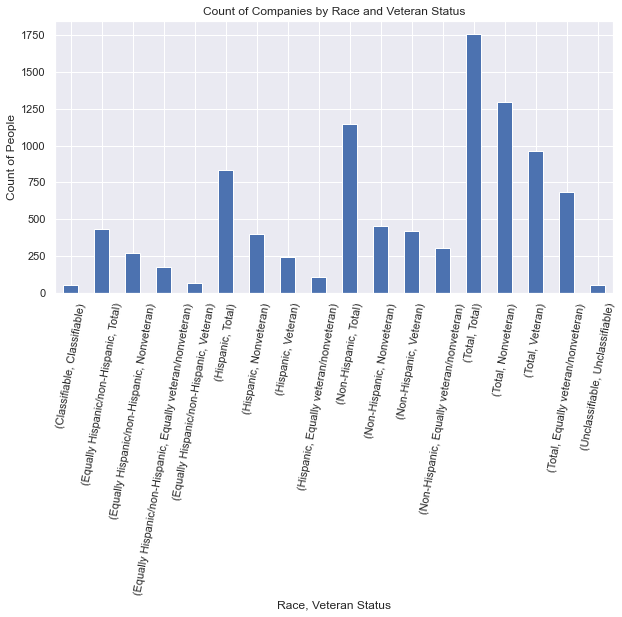

In [23]:
# df_summary.head()
race_veteran_status =df_summary.groupby(["ETH_GROUP_LABEL"])["VET_GROUP_LABEL"].value_counts().copy()
plt.figure(figsize=(10,5))
race_veteran_status.plot.bar()
plt.xlabel("Race, Veteran Status")
plt.ylabel("Count of People")
plt.title("Count of Companies by Race and Veteran Status")
plt.xticks(rotation = 80);

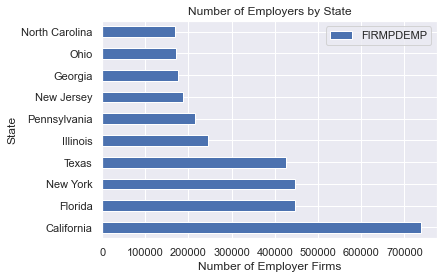

In [24]:
sns.set_theme(style="darkgrid")
df_business["FIRMPDEMP"]= df_business["FIRMPDEMP"].astype(str).astype(int)
df_business_top10 = df_business.sort_values(by=["FIRMPDEMP"], ascending=False)
df_business_top10 = df_business_top10.head(10)
df_business_top10.head(20)
df_business_top10.plot.barh(x="NAME",y="FIRMPDEMP")
plt.ylabel("State")
plt.xlabel("Number of Employer Firms")
plt.title("Number of Employers by State");

In [25]:
df_tech_name_emp_geo = df_tech[["NAME","GEO_ID","EMP"]].copy()
df_tech_name_emp_geo["EMP"] = df_tech_name_emp_geo["EMP"].astype(str).astype(int)
df_tech_name_emp_geo_mean =df_tech_name_emp_geo[["NAME","GEO_ID","EMP"]].groupby(["NAME","GEO_ID"])["EMP"].sum()
df_tech_name_emp_geo_mean.head()
owner_buisness = df_owner.merge(df_business,how="inner",on="GEO_ID")
business_owner_tech = owner_buisness.merge(df_tech_name_emp_geo_mean,how="inner",on="GEO_ID")
business_owner_tech_summary = business_owner_tech.merge(df_summary,how="inner",on="GEO_ID")
employee_employeer_state =business_owner_tech_summary.groupby(["NAME"])["NAME","EMP_x","FIRMPDEMP_x"].mean().copy()
employee_employeer_state.head()



C:\Users\patel\AppData\Local\Temp/ipykernel_34008/3728162402.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  employee_employeer_state =business_owner_tech_summary.groupby(["NAME"])["NAME","EMP_x","FIRMPDEMP_x"].mean().copy()


,FIRMPDEMP_x
NAME,
Alabama,67504.0
Alaska,15698.0
Arizona,107152.0
Arkansas,47250.0
California,738370.0


<Figure size 1440x1440 with 0 Axes>

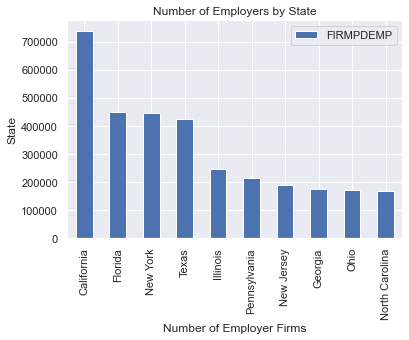

In [26]:
plt.figure(figsize=(20,20))
df_business["FIRMPDEMP"]= df_business["FIRMPDEMP"].astype(str).astype(int)
df_business_top10 = df_business.sort_values(by=["FIRMPDEMP"], ascending=False)
df_business_top10 = df_business_top10.head(10)
df_business_top10.head(20)
df_business_top10.plot.bar(x="NAME",y="FIRMPDEMP")
plt.ylabel("State")
plt.xlabel("Number of Employer Firms")
plt.title("Number of Employers by State");

<Figure size 1440x1440 with 0 Axes>

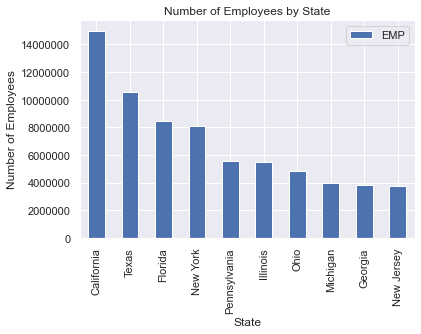

In [27]:
plt.figure(figsize=(20,20))
df_business["EMP"]= df_business["EMP"].astype(str).astype(int)
df_business_top10 = df_business.sort_values(by=["EMP"], ascending=False)
df_business_top10 = df_business_top10.head(10)
df_business_top10.head(20)
df_business_top10.plot.bar(x="NAME",y="EMP")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.title("Number of Employees by State");

C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


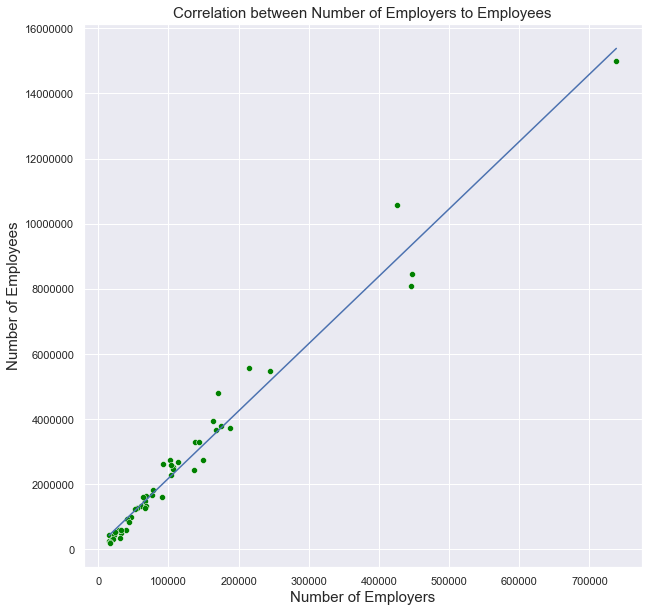

In [32]:
business_employee_employer = df_business[["NAME","EMP","FIRMPDEMP"]].sort_values(by="NAME")
business_employee_employer = business_employee_employer[["EMP","FIRMPDEMP"]]
x_employer = business_employee_employer["FIRMPDEMP"].tolist()
y_employee = business_employee_employer["EMP"].tolist()
x_axis =np.array(x_employer, dtype=np.int64)
y_axis = np.array(y_employee, dtype=np.int64)
employee_employer_model = linear_model.LinearRegression()
employee_employer_model.fit(x_axis.reshape(-1,1),y_axis)
regression_line = employee_employer_model.predict(x_axis.reshape(-1,1))
plt.figure(figsize=(10,10))
ax =sns.scatterplot(x=x_axis, y=y_axis, color ="Green")
ax1 = sns.lineplot(x_axis, y=regression_line)
ax.set_xlabel("Number of Employers",fontsize =15)
ax.set_ylabel("Number of Employees", fontsize = 15)
ax.set_title("Correlation between Number of Employers to Employees", fontsize = 15)
plt.ticklabel_format(style='plain', axis='y');
